# **Working notebook: Validation Data EDA and Wrangling**

The current notebook shows the work done to the validation data before uploading it to notebook `05-model-analysis`. 

In [30]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## **Energy Validation Data**

In [31]:
#Download CSV file, it was sourced from the ESO webpage
df_validation = pd.read_csv('../data/demanddata.csv', index_col=0)

In [32]:
#Check load
df_validation.head()

,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW
SETTLEMENT_DATE,,,,,,,,,,,,,,,,,,
2023-01-01,1,21043,24680,18995,2815,6545,0,13080,0,1161,609,903,-896,-451,-529,253,235,998
2023-01-01,2,21756,25289,19730,2793,6545,0,13080,0,1056,596,904,-897,-451,-529,252,157,998
2023-01-01,3,21348,25269,19327,2773,6545,0,13080,0,1212,516,983,-910,-451,-529,253,-219,999
2023-01-01,4,20586,24574,18589,2753,6545,0,13080,0,1237,510,989,-911,-413,-529,254,-298,999
2023-01-01,5,19781,24135,17806,2712,6545,0,13080,0,1233,600,903,-912,-401,-529,253,-679,998


In [33]:
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6958 entries, 2023-01-01 to 2023-05-25
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   SETTLEMENT_PERIOD          6958 non-null   int64
 1   ND                         6958 non-null   int64
 2   TSD                        6958 non-null   int64
 3   ENGLAND_WALES_DEMAND       6958 non-null   int64
 4   EMBEDDED_WIND_GENERATION   6958 non-null   int64
 5   EMBEDDED_WIND_CAPACITY     6958 non-null   int64
 6   EMBEDDED_SOLAR_GENERATION  6958 non-null   int64
 7   EMBEDDED_SOLAR_CAPACITY    6958 non-null   int64
 8   NON_BM_STOR                6958 non-null   int64
 9   PUMP_STORAGE_PUMPING       6958 non-null   int64
 10  IFA_FLOW                   6958 non-null   int64
 11  IFA2_FLOW                  6958 non-null   int64
 12  BRITNED_FLOW               6958 non-null   int64
 13  MOYLE_FLOW                 6958 non-null   int64
 14  EAST_WEST_FLOW

In [34]:
#Make the index datetime

df_validation = df_validation.set_index(pd.to_datetime(df_validation.index))

In [35]:
#Check that everything is ok with the index
print(f"Index data type: {type(df_validation.index)}")
print(f"Index in increasing order: {df_validation.index.is_monotonic_increasing}")
print(f"Index with unique values: {df_validation.index.is_unique}")

Index data type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index in increasing order: True
Index with unique values: False


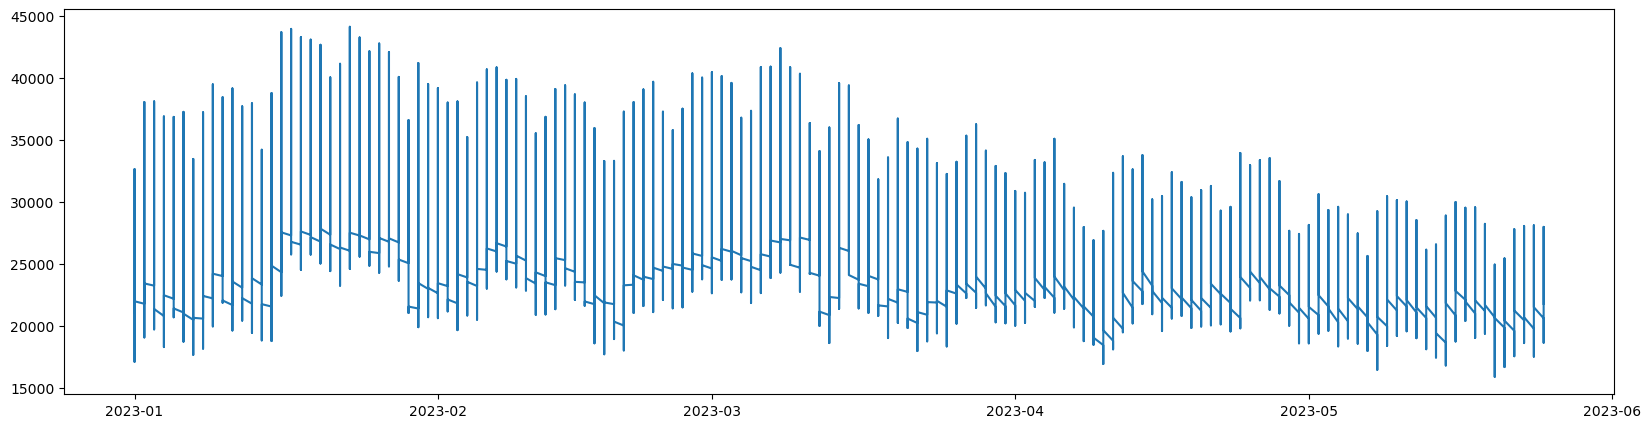

In [36]:
#Plot target variable
plt.figure(figsize=(20,5))
plt.plot(df_validation['ND'])

#the plot does not show a continous line, this is because of the granularity of the index the next codeblock will fix it

In [37]:
# Create a new column for hours based on the settlement period
df_validation['hours'] = (df_validation['SETTLEMENT_PERIOD'] - 1) * 0.5

# Create a new column for the datetime index with added hours
df_validation['new_index'] = df_validation.index.floor('D') + pd.to_timedelta(df_validation['hours'], unit='H')

# Set the new column as the index
df_validation.set_index('new_index', inplace=True)

# Drop the unnecessary columns
df_validation.drop(columns=['SETTLEMENT_PERIOD', 'hours'], inplace=True)

# Verify the updated DataFrame
df_validation.head()


,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW
new_index,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,21043,24680,18995,2815,6545,0,13080,0,1161,609,903,-896,-451,-529,253,235,998
2023-01-01 00:30:00,21756,25289,19730,2793,6545,0,13080,0,1056,596,904,-897,-451,-529,252,157,998
2023-01-01 01:00:00,21348,25269,19327,2773,6545,0,13080,0,1212,516,983,-910,-451,-529,253,-219,999
2023-01-01 01:30:00,20586,24574,18589,2753,6545,0,13080,0,1237,510,989,-911,-413,-529,254,-298,999
2023-01-01 02:00:00,19781,24135,17806,2712,6545,0,13080,0,1233,600,903,-912,-401,-529,253,-679,998


In [38]:
df_validation.index

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:30:00',
               '2023-01-01 01:00:00', '2023-01-01 01:30:00',
               '2023-01-01 02:00:00', '2023-01-01 02:30:00',
               '2023-01-01 03:00:00', '2023-01-01 03:30:00',
               '2023-01-01 04:00:00', '2023-01-01 04:30:00',
               ...
               '2023-05-25 19:00:00', '2023-05-25 19:30:00',
               '2023-05-25 20:00:00', '2023-05-25 20:30:00',
               '2023-05-25 21:00:00', '2023-05-25 21:30:00',
               '2023-05-25 22:00:00', '2023-05-25 22:30:00',
               '2023-05-25 23:00:00', '2023-05-25 23:30:00'],
              dtype='datetime64[ns]', name='new_index', length=6958, freq=None)

In [39]:
#Resample df
df_validation_monthly = df_validation.resample("MS").sum()

df_validation_daily = df_validation.resample("D").sum()

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_validation_monthly.index, y=df_validation_monthly['ND'], mode='lines', name='ND'))
fig.update_layout(xaxis_title='Date', yaxis_title='ND', title='ND Plot')
fig.show()

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_validation_daily.index, y=df_validation_daily['ND'], mode='lines', name='ND'))
fig.update_layout(xaxis_title='Date', yaxis_title='ND', title='ND Plot')
fig.show()

In [42]:
df_validation_monthly['import_export'] = df_validation_monthly['IFA_FLOW'] + df_validation_monthly['IFA2_FLOW'] + df_validation_monthly['BRITNED_FLOW'] + df_validation_monthly['MOYLE_FLOW'] + df_validation_monthly['EAST_WEST_FLOW'] + df_validation_monthly['NEMO_FLOW'] 

In [43]:
df_validation_monthly.columns

Index(['ND', 'TSD', 'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION',
       'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION',
       'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING',
       'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW', 'EAST_WEST_FLOW',
       'NEMO_FLOW', 'NSL_FLOW', 'ELECLINK_FLOW', 'import_export'],
      dtype='object')

In [44]:
df_validation_monthly.drop(columns=['IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW','MOYLE_FLOW', 'EAST_WEST_FLOW', 'NEMO_FLOW'], inplace=True)

In [45]:
df_validation.to_csv('../data/validation_data.csv', index=True)
df_validation_daily.to_csv('../data/daily_validation_data.csv', index=True)
df_validation_monthly.to_csv('../data/monthly_validation_data.csv', index=True)

## **Temperature Data**

In [46]:
temp= pd.read_csv('../data/UK.txt', skiprows=5, sep = '   ')

C:\Users\simon\AppData\Local\Temp\ipykernel_16792\59849141.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [47]:
temp.head(5)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1884,7.3,6.8,8.5,10.1,14.5,17.1,18.8,20.2,17.0,11.8,7.5,5.8,---,11.02,18.73,12.10,12.14
1,1885,4.3,7.3,7.2,10.8,11.8,17.0,19.4,16.8,15.0,9.3,7.5,5.9,5.75,9.91,17.76,10.58,11.04
2,1886,3.7,3.4,6.1,10.5,13.1,16.4,18.7,18.5,16.0,12.9,8.6,4.1,4.36,9.88,17.87,12.51,11.04
3,1887,4.8,6.9,6.7,9.9,13.0,19.8,20.7,19.1,14.5,10.0,6.6,4.9,5.23,9.88,19.87,10.37,11.44
4,1888,5.5,3.7,5.2,9.0,14.1,16.3,16.0,16.9,15.4,11.4,8.9,7.1,4.74,9.41,16.38,11.91,10.81


In [48]:
temp.columns

Index(['year', ' jan', ' feb', ' mar', ' apr', ' may', ' jun', ' jul', ' aug',
       ' sep', ' oct', ' nov', ' dec', '  win', '  spr', '  sum', '  aut',
       '  ann'],
      dtype='object')

In [49]:
#drop season and annual columns
temp.drop(columns=['  win', '  spr', '  sum', '  aut', '  ann'], inplace=True)

In [50]:
#Remove spaces in columns names 

temp.columns = temp.columns.str.replace(' ', '')

In [51]:
#Limit df to necessary values
temp2 = temp[temp['year'] >= 2009]
temp = temp[temp['year'] >= 2009]

In [52]:
# Reshape temp df using melt()
melted_df = temp.melt(id_vars='year', var_name='month', value_name='temperature')

# Combine year and month  into a single index
melted_df['date'] = pd.to_datetime(melted_df['year'].astype(str) + '-' + melted_df['month'], format='%Y-%b')
melted_df.set_index('date', inplace=True)

melted_df.drop(['year', 'month'], axis=1, inplace=True)

melted_df.sort_index(inplace=True)

print(melted_df)

            temperature
date                   
2009-01-01          5.7
2009-02-01          6.4
2009-03-01          9.9
2009-04-01         13.3
2009-05-01         15.3
...                 ...
2023-08-01          NaN
2023-09-01          NaN
2023-10-01          NaN
2023-11-01          NaN
2023-12-01          NaN

[180 rows x 1 columns]


In [53]:
#Repeat procces for melted_df2
melted_df2 = temp2.melt(id_vars='year', var_name='month', value_name='temperature')
melted_df2['date'] = pd.to_datetime(melted_df2['year'].astype(str) + '-' + melted_df2['month'], format='%Y-%b')
melted_df2.set_index('date', inplace=True)
melted_df2.drop(['year', 'month'], axis=1, inplace=True)
melted_df2.sort_index(inplace=True)
melted_df2.dropna(inplace=True)
print(melted_df2)


            temperature
date                   
2009-01-01          5.7
2009-02-01          6.4
2009-03-01          9.9
2009-04-01         13.3
2009-05-01         15.3
...                 ...
2023-01-01          7.3
2023-02-01          9.0
2023-03-01          8.9
2023-04-01         11.9
2023-05-01         16.2

[173 rows x 1 columns]


In [54]:
melted_df.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='date', length=180, freq=None)

In [55]:
melted_df.dropna(inplace=True)
melted_df.shape

(173, 1)

In [56]:
#Save data
melted_df.to_csv('../data/temperature_data.csv', index=True)
melted_df2.to_csv('../data/val_temperature_data.csv', index=True)